In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.2.3
2.2.2
0.13.2


In [50]:
df = pd.read_csv('transit_data.tsv',delimiter=',')
df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108


In [4]:
print(df.columns)

Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')


In [5]:
print(df.dtypes)

Date                                                       object
Subways: Total Estimated Ridership                          int64
Subways: % of Comparable Pre-Pandemic Day                   int64
Buses: Total Estimated Ridership                            int64
Buses: % of Comparable Pre-Pandemic Day                     int64
LIRR: Total Estimated Ridership                             int64
LIRR: % of Comparable Pre-Pandemic Day                      int64
Metro-North: Total Estimated Ridership                      int64
Metro-North: % of Comparable Pre-Pandemic Day               int64
Access-A-Ride: Total Scheduled Trips                        int64
Access-A-Ride: % of Comparable Pre-Pandemic Day             int64
Bridges and Tunnels: Total Traffic                          int64
Bridges and Tunnels: % of Comparable Pre-Pandemic Day       int64
Staten Island Railway: Total Estimated Ridership            int64
Staten Island Railway: % of Comparable Pre-Pandemic Day     int64
dtype: obj

In [37]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Verify the conversion
print(df['Date'].dtype)  # Should output: datetime64[ns]
print(df['Date'].head())

datetime64[ns]
0   2020-03-01
1   2020-03-02
2   2020-03-03
3   2020-03-04
4   2020-03-05
Name: Date, dtype: datetime64[ns]


In [38]:
df.set_index('Date', inplace=True)
print(df.head())


            Subways: Total Estimated Ridership  \
Date                                             
2020-03-01                             2212965   
2020-03-02                             5329915   
2020-03-03                             5481103   
2020-03-04                             5498809   
2020-03-05                             5496453   

            Subways: % of Comparable Pre-Pandemic Day  \
Date                                                    
2020-03-01                                         97   
2020-03-02                                         96   
2020-03-03                                         98   
2020-03-04                                         99   
2020-03-05                                         99   

            Buses: Total Estimated Ridership  \
Date                                           
2020-03-01                            984908   
2020-03-02                           2209066   
2020-03-03                           2228608   
2020-03-0

In [39]:
print(df.isnull().sum())

Subways: Total Estimated Ridership                         0
Subways: % of Comparable Pre-Pandemic Day                  0
Buses: Total Estimated Ridership                           0
Buses: % of Comparable Pre-Pandemic Day                    0
LIRR: Total Estimated Ridership                            0
LIRR: % of Comparable Pre-Pandemic Day                     0
Metro-North: Total Estimated Ridership                     0
Metro-North: % of Comparable Pre-Pandemic Day              0
Access-A-Ride: Total Scheduled Trips                       0
Access-A-Ride: % of Comparable Pre-Pandemic Day            0
Bridges and Tunnels: Total Traffic                         0
Bridges and Tunnels: % of Comparable Pre-Pandemic Day      0
Staten Island Railway: Total Estimated Ridership           0
Staten Island Railway: % of Comparable Pre-Pandemic Day    0
dtype: int64


In [44]:
df.fillna(0, inplace=True)

In [45]:
df.dropna(subset=['Subways: Total Estimated Ridership'], inplace=True)

In [46]:
ridership_cols = [
    'Subways: Total Estimated Ridership',
    'Buses: Total Estimated Ridership',
    'LIRR: Total Estimated Ridership',
    'Metro-North: Total Estimated Ridership',
    # Add other ridership columns as needed
]
for col in ridership_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [47]:
percent_cols = [
    'Subways: % of Comparable Pre-Pandemic Day',
    'Buses: % of Comparable Pre-Pandemic Day',
    # Add other percentage columns
]
for col in percent_cols:
    df[col] = df[col].replace('%', '', regex=True).astype(float) / 100

In [48]:
df.drop_duplicates(inplace=True)

In [14]:
print(df[ridership_cols].describe())

       Subways: Total Estimated Ridership  Buses: Total Estimated Ridership  \
count                        1.706000e+03                      1.706000e+03   
mean                         2.509055e+06                      1.006868e+06   
std                          1.062184e+06                      4.403799e+05   
min                          1.983990e+05                      5.498000e+03   
25%                          1.715396e+06                      7.152495e+05   
50%                          2.459607e+06                      1.140776e+06   
75%                          3.440053e+06                      1.347620e+06   
max                          5.498809e+06                      2.244515e+06   

       LIRR: Total Estimated Ridership  Metro-North: Total Estimated Ridership  
count                      1706.000000                             1706.000000  
mean                     135960.116061                           114888.273154  
std                       71298.778711       

In [15]:
df = df[df[ridership_cols].ge(0).all(axis=1)]  # Keep rows where all ridership >= 0

In [16]:
print(df[ridership_cols].describe())
print(df[percent_cols].describe())

       Subways: Total Estimated Ridership  Buses: Total Estimated Ridership  \
count                        1.706000e+03                      1.706000e+03   
mean                         2.509055e+06                      1.006868e+06   
std                          1.062184e+06                      4.403799e+05   
min                          1.983990e+05                      5.498000e+03   
25%                          1.715396e+06                      7.152495e+05   
50%                          2.459607e+06                      1.140776e+06   
75%                          3.440053e+06                      1.347620e+06   
max                          5.498809e+06                      2.244515e+06   

       LIRR: Total Estimated Ridership  Metro-North: Total Estimated Ridership  
count                      1706.000000                             1706.000000  
mean                     135960.116061                           114888.273154  
std                       71298.778711       

In [17]:
monthly_ridership = df[ridership_cols].resample('M').mean()
print(monthly_ridership.head())

            Subways: Total Estimated Ridership  \
Date                                             
2020-03-31                        2.375007e+06   
2020-04-30                        3.910158e+05   
2020-05-31                        4.927694e+05   
2020-06-30                        7.976101e+05   
2020-07-31                        1.048676e+06   

            Buses: Total Estimated Ridership  LIRR: Total Estimated Ridership  \
Date                                                                            
2020-03-31                      1.028122e+06                    116942.709677   
2020-04-30                      1.571717e+04                      7244.433333   
2020-05-31                      1.324852e+04                     16191.225806   
2020-06-30                      2.194580e+04                     39887.833333   
2020-07-31                      2.671316e+04                     57693.451613   

            Metro-North: Total Estimated Ridership  
Date                        

C:\Users\DELL\AppData\Local\Temp\ipykernel_12768\1153531826.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ridership = df[ridership_cols].resample('M').mean()


In [18]:
print(df[ridership_cols].corr())

                                        Subways: Total Estimated Ridership  \
Subways: Total Estimated Ridership                                1.000000   
Buses: Total Estimated Ridership                                  0.885687   
LIRR: Total Estimated Ridership                                   0.962208   
Metro-North: Total Estimated Ridership                            0.942297   

                                        Buses: Total Estimated Ridership  \
Subways: Total Estimated Ridership                              0.885687   
Buses: Total Estimated Ridership                                1.000000   
LIRR: Total Estimated Ridership                                 0.797012   
Metro-North: Total Estimated Ridership                          0.747091   

                                        LIRR: Total Estimated Ridership  \
Subways: Total Estimated Ridership                             0.962208   
Buses: Total Estimated Ridership                               0.797012   
LIR

In [19]:
print(df[percent_cols].mean())  # Average recovery rate per mode

Subways: % of Comparable Pre-Pandemic Day    0.554613
Buses: % of Comparable Pre-Pandemic Day      0.546928
dtype: float64


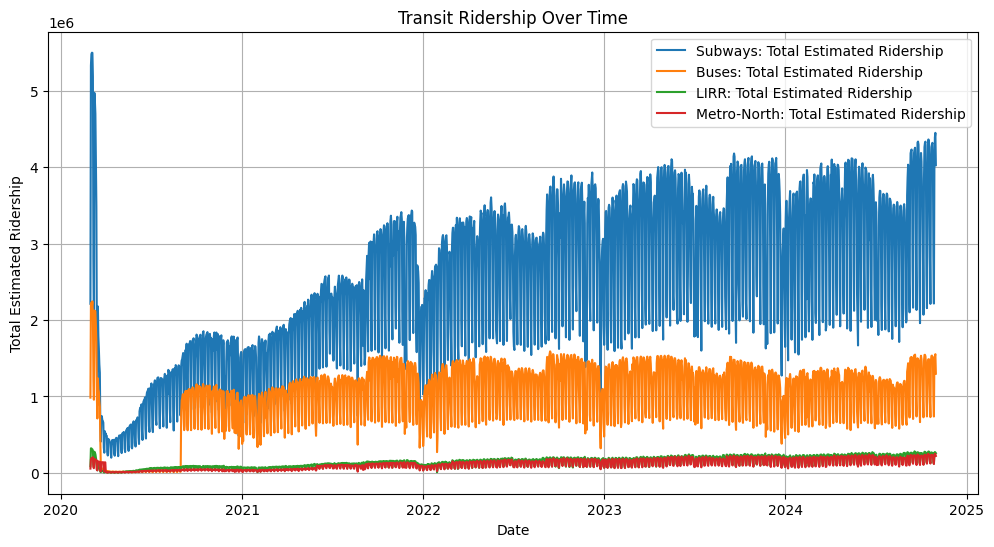

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for col in ridership_cols:
    plt.plot(df.index, df[col], label=col)
plt.title('Transit Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Total Estimated Ridership')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

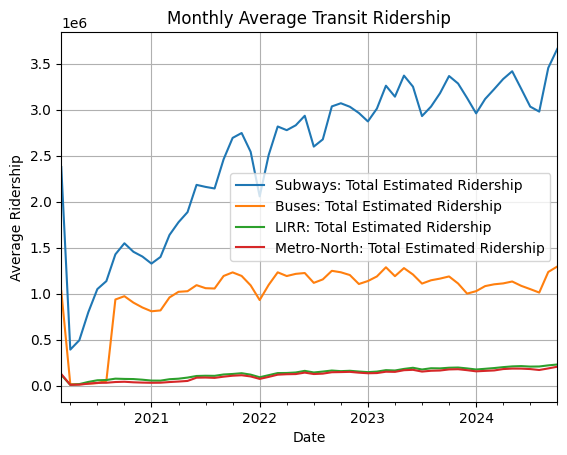

In [21]:
plt.figure(figsize=(12, 6))
monthly_ridership.plot()
plt.title('Monthly Average Transit Ridership')
plt.xlabel('Date')
plt.ylabel('Average Ridership')
plt.legend()
plt.grid(True)
plt.show()

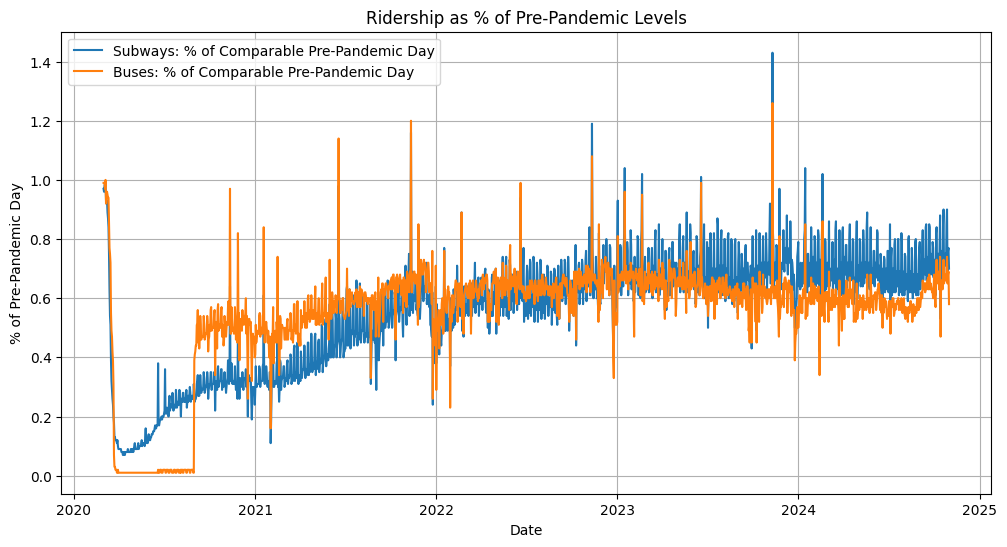

In [22]:
plt.figure(figsize=(12, 6))
for col in percent_cols:
    plt.plot(df.index, df[col], label=col)
plt.title('Ridership as % of Pre-Pandemic Levels')
plt.xlabel('Date')
plt.ylabel('% of Pre-Pandemic Day')
plt.legend()
plt.grid(True)
plt.show()

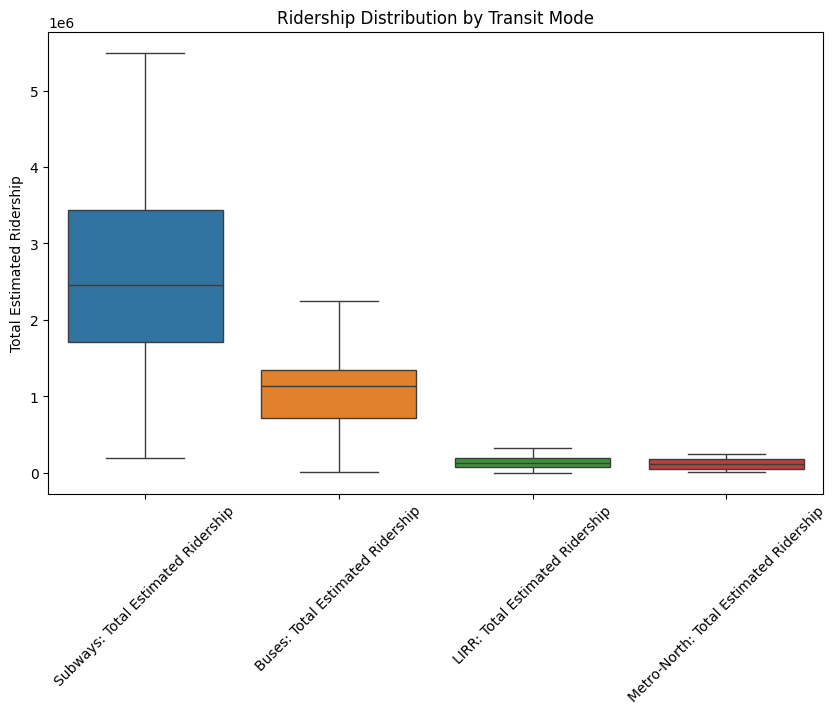

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[ridership_cols])
plt.title('Ridership Distribution by Transit Mode')
plt.xticks(rotation=45)
plt.ylabel('Total Estimated Ridership')
plt.show()

In [24]:
print("Average Recovery Rates:")
print(df[percent_cols].mean())

Average Recovery Rates:
Subways: % of Comparable Pre-Pandemic Day    0.554613
Buses: % of Comparable Pre-Pandemic Day      0.546928
dtype: float64


In [25]:
df.head()

,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
Date,,,,,,,,,,,,,,
2020-03-01,2212965,0.97,984908,0.99,86790,100,55825,59,19922,113,786960,98,1636,52
2020-03-02,5329915,0.96,2209066,0.99,321569,103,180701,66,30338,102,874619,95,17140,107
2020-03-03,5481103,0.98,2228608,0.99,319727,102,190648,69,32767,110,882175,96,17453,109
2020-03-04,5498809,0.99,2177165,0.97,311662,99,192689,70,34297,115,905558,98,17136,107
2020-03-05,5496453,0.99,2244515,1.00,307597,98,194386,70,33209,112,929298,101,17203,108


C:\Users\DELL\AppData\Local\Temp\ipykernel_12768\3718063368.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df[ridership_cols].resample('M').mean()


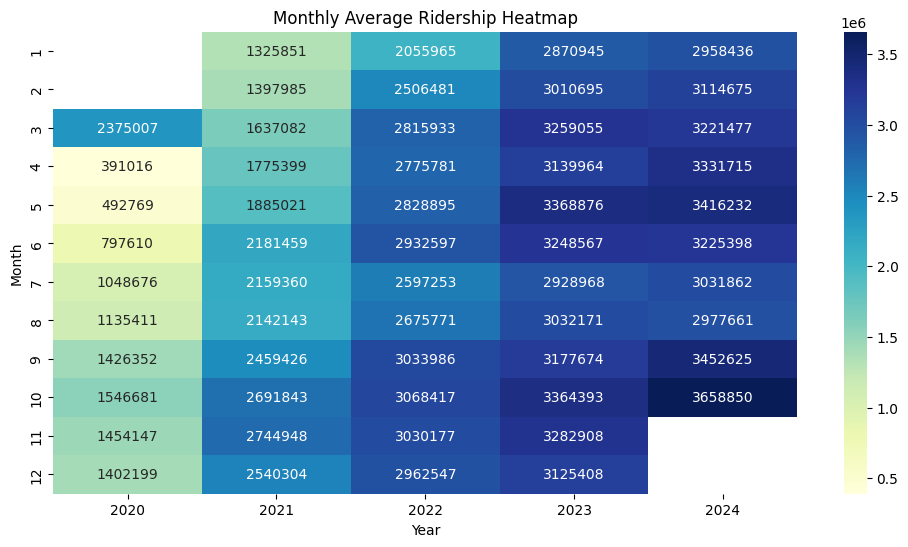

In [26]:
# Resample data to get monthly averages
monthly_avg = df[ridership_cols].resample('M').mean()

# Create a pivot table with months as rows and transit modes as columns
monthly_avg['Month'] = monthly_avg.index.month
monthly_avg['Year'] = monthly_avg.index.year
pivot_table = monthly_avg.pivot_table(index='Month', columns='Year', values=ridership_cols[0])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Monthly Average Ridership Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


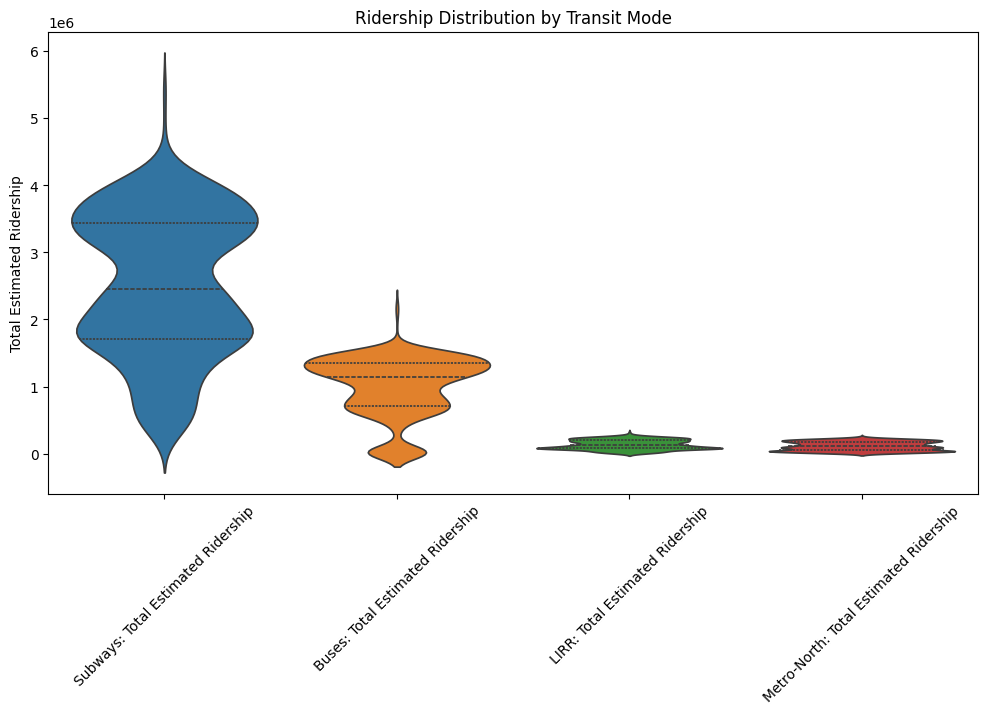

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[ridership_cols], inner='quartile')
plt.title('Ridership Distribution by Transit Mode')
plt.xticks(rotation=45)
plt.ylabel('Total Estimated Ridership')
plt.show()


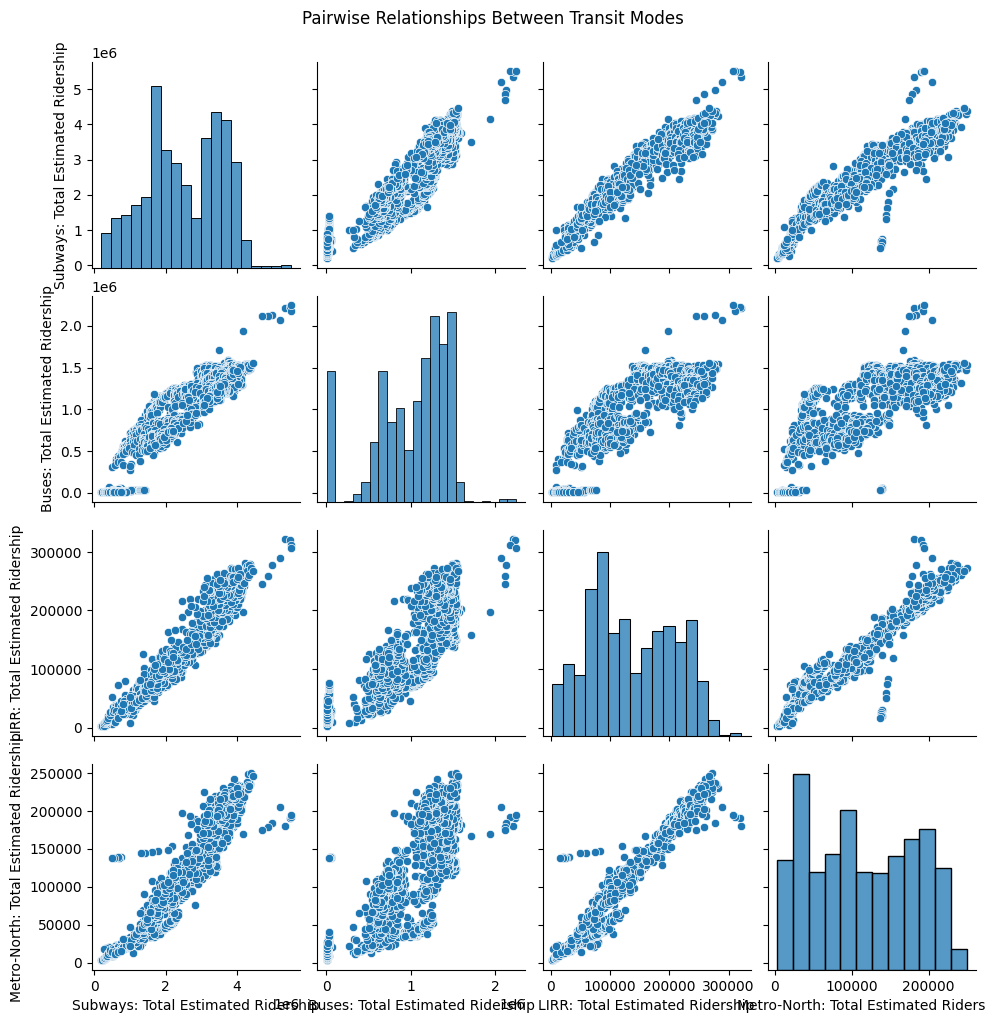

In [28]:
sns.pairplot(df[ridership_cols])
plt.suptitle('Pairwise Relationships Between Transit Modes', y=1.02)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12768\3932339264.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = df[ridership_cols].resample('M').sum()


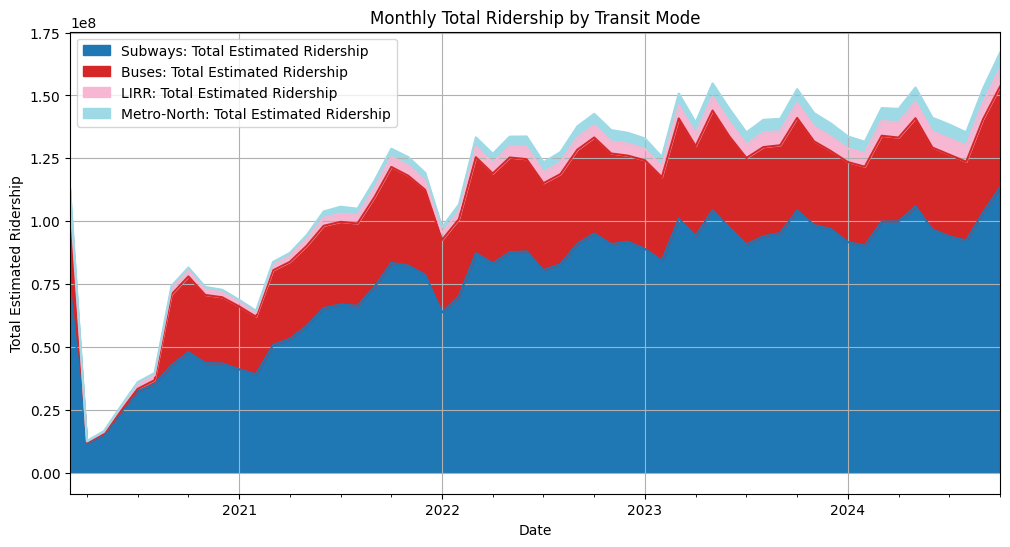

In [29]:
# Resample data to get monthly sums
monthly_sum = df[ridership_cols].resample('M').sum()

# Plot stacked area chart
monthly_sum.plot.area(figsize=(12, 6), cmap='tab20')
plt.title('Monthly Total Ridership by Transit Mode')
plt.xlabel('Date')
plt.ylabel('Total Estimated Ridership')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


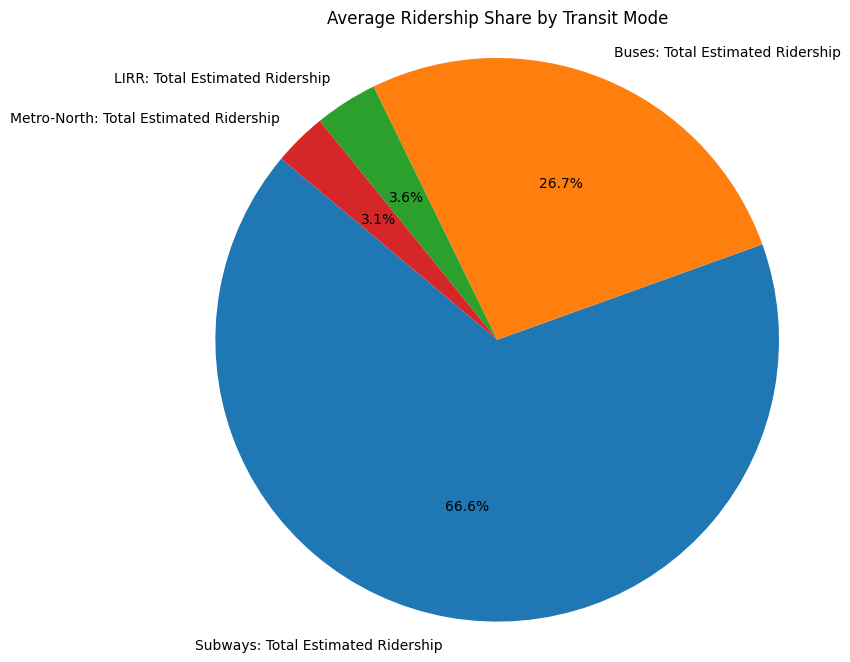

In [30]:
# Calculate average ridership per mode
average_ridership = df[ridership_cols].mean()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    average_ridership,
    labels=average_ridership.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Average Ridership Share by Transit Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


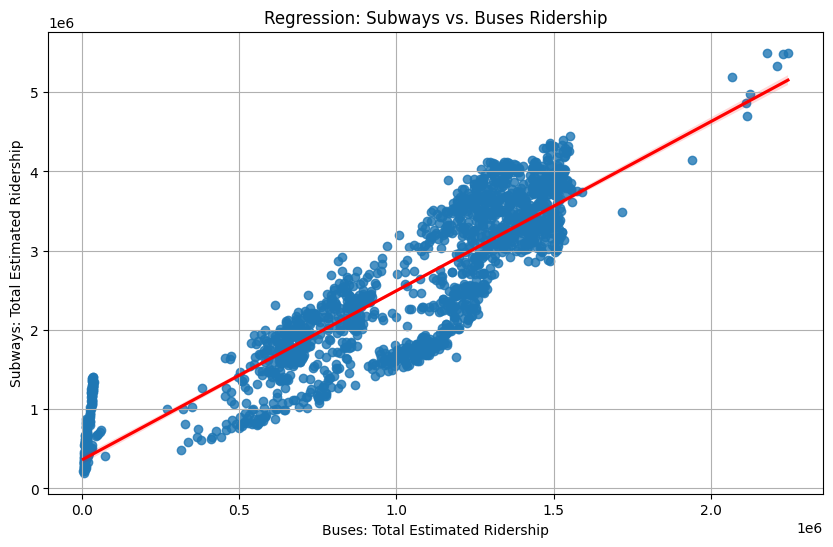

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Buses: Total Estimated Ridership', y='Subways: Total Estimated Ridership', data=df, line_kws={'color': 'red'})
plt.title('Regression: Subways vs. Buses Ridership')
plt.xlabel('Buses: Total Estimated Ridership')
plt.ylabel('Subways: Total Estimated Ridership')
plt.grid(True)
plt.show()
